*****
# Text readability on Github is distorted. Please download notebook.
*****

# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
%matplotlib inline

## Answer to Exercises

## **1.  Is the distribution of body temperatures normal?**
<ul>

$ \color{darkblue} {\Large \textrm { Exploratory Data Analysis }  }$

In [4]:
# Review dataset features and a few observations
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
# Review data info for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [6]:
# Use describe attribute to review data statistics
df.describe().apply(lambda x: round(x,2))

,temperature,heart_rate
count,130.00,130.00
mean,98.25,73.76
std,0.73,7.06
min,96.30,57.00
25%,97.80,69.00
50%,98.30,74.00
75%,98.70,79.00
max,100.80,89.00


$ \color{darkblue} {\Large \textrm { Data Statistics: }
\large \textrm { Anlayzing measures of central tendency and variance } } $

In [7]:
print('\nTrimean = (97.8 + 98.3*2 + 98.7)/4 = %.2f F' \
      % round((97.8+98.3*2+98.7)/4,2))
print('\nMODE =  %.2f F (Most frequent measured temperature)' \
      % df.temperature.mode())
print('\nIQR = 98.70 - 97.80 = 0.9')
print('\nPearson\'s measure of Skew = 3(Mean-Median)/sigma = %.2f' \
      % (3*(df.temperature.mean()-df.temperature.median())/df.temperature.std()))
print('\nSkew = %.4f' % stats.skew(df.temperature))
print('\nKurtosis = %.2f' % stats.kurtosis(df.temperature))


Trimean = (97.8 + 98.3*2 + 98.7)/4 = 98.27 F

MODE =  98.00 F (Most frequent measured temperature)

IQR = 98.70 - 97.80 = 0.9

Pearson's measure of Skew = 3(Mean-Median)/sigma = -0.21

Skew = -0.0044

Kurtosis = 0.70


$ \color{darkblue} {\textrm {Sample mean, median and mode are primary mesures of central tendency and  normal distribution. } } $
<ul></ul>
$ \color{darkblue} {
\textrm {When Mean = Median = Mode the ditribution is centered at mean and symmetric gaussian distribution is expected. }
\\
\textrm {For Mean < Median < Mode a negative skew is expected. (peak of the curve shifted to the right) }
\\
\textrm {For Mean > Median > Mode a positve skew is expected. (peak of the curve shifted to the left) } } $
<ul></ul>
$ \color{darkblue} {
\textrm {Here we have Mode < Mean < Median (98 < 98.25 < 98.3) which may indicate a possible skew. }
\\
\textrm {The calculated skew of -0.0044 indicates a slight shift of distribution to the right. }
\\
\textrm {The kurtosis of 0.7 indicates nice bell-shaped distribution. } } $
<ul></ul>
$ \color{darkblue} {
\textrm {Measures of Variation and Spread: }
\\
\textrm {Standard diviation = 0.73 }
\\
\textrm {IQR = 0.9}
\\
\textrm {Range = Max - Min = 100.80 - 96.30 = 4.5 }
} $
<ul></ul>
$ \color{darkblue} {\textrm {Data appears to be a } } $
$ \color{darkblue} {\style{background-color:yellow} {\bf\;Normal\;Distribution.\;} } $

In [8]:
normality_test = stats.mstats.normaltest(df.temperature) 
print('The z-statstic of the normality test is %.4f with a p-value of %.4f.' \
      % (normality_test[0],normality_test[1]))

The z-statstic of the normality test is 2.7038 with a p-value of 0.2587.


In [9]:
from collections import Counter
# get list temperature counts for an apporoximation of the distribution
Temp_count = pd.DataFrame(Counter(df.temperature).most_common(), columns=['Temperature', 'Frequency'])\
      .set_index('Temperature')
# print top 10 most frequent observed human body temperature
Temp_count.iloc[0:10].style

,Frequency
Temperature,
98.0,11
98.8,10
98.6,10
98.2,10
98.4,9
98.7,8
97.8,7
98.3,5
97.9,5


$ \color{darkblue} {\Large \textrm {Graphical Analysis for Normal Distribution } } $

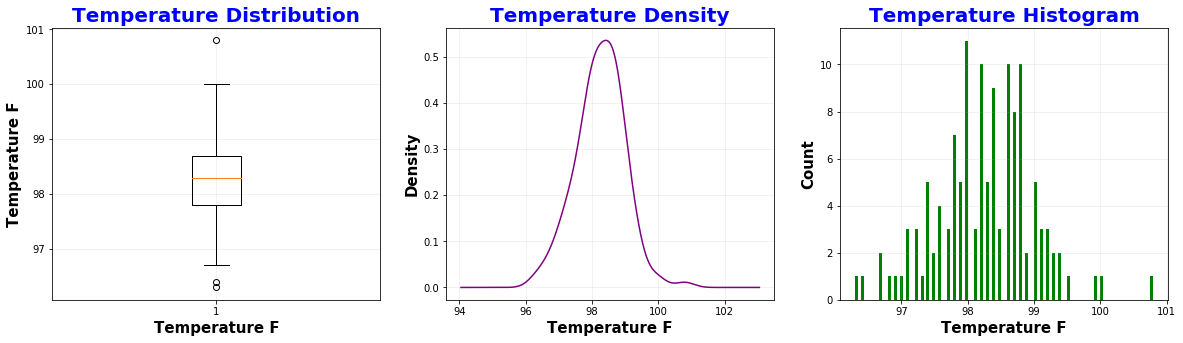

In [10]:
_ = plt.subplots(figsize = [20,5])
# Temperature Box Plot
_ = plt.subplot(131)
_ = plt.boxplot(df.temperature)
_ = plt.xlabel('Temperature F', fontweight= 'bold', size = 15, color='k')
_ = plt.ylabel('Temperature F', fontweight= 'bold', size = 15, color='k')
_ = plt.title('Temperature Distribution',fontweight= 'bold', size = 20, color='b')
_ = plt.grid(alpha=0.2)
# Temperature Density Plot
_ = plt.subplot(132)
df.temperature.plot.density(color='purple')
_ = plt.xlabel('Temperature F', fontweight= 'bold', size = 15, color='k')
_ = plt.ylabel('Density', fontweight= 'bold', size = 15, color='k')
_ = plt.title('Temperature Density',fontweight= 'bold', size = 20, color='b')
_ = plt.grid(alpha=0.2)
# Temperature Histogram
_ = plt.subplot(133)
df.temperature.hist(color='g', bins=100)
_ = plt.xlabel('Temperature F', fontweight= 'bold', size = 15, color='k')
_ = plt.ylabel('Count', fontweight= 'bold', size = 15, color='k')
_ = plt.title('Temperature Histogram',fontweight= 'bold', size = 20, color='b')
_ = plt.grid(alpha=0.2)
_ = plt.show()

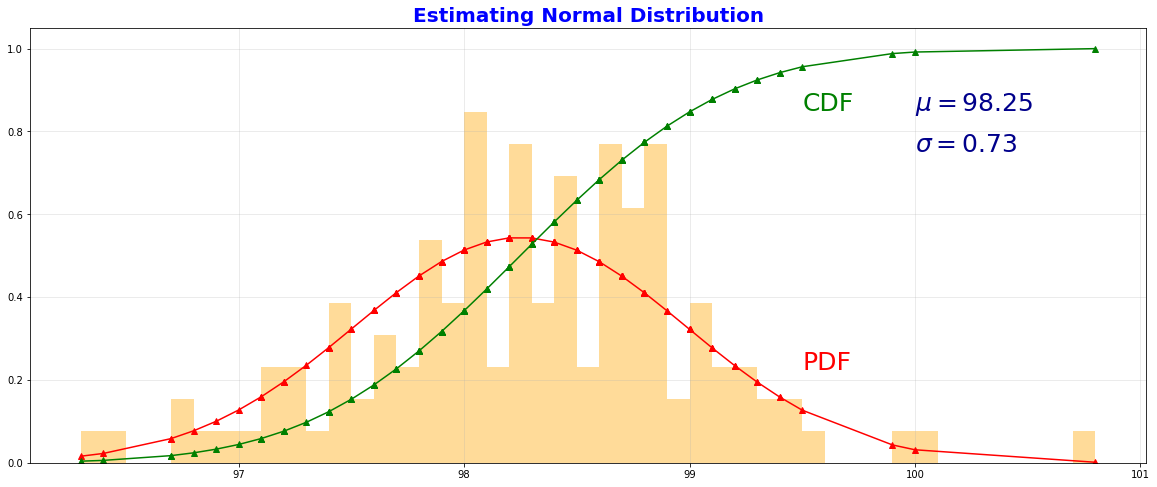

In [11]:
sorted_temps = sorted(df.temperature)

# fit normal distribution probability density function (pdf)
fit_pdf = stats.norm.pdf(sorted_temps, df.temperature.mean(), df.temperature.std())
# fit normal distribution cumulative density function (cdf)
fit_cdf = stats.norm.cdf(sorted_temps, df.temperature.mean(), df.temperature.std())

_ = plt.figure(1, figsize=(20, 8))
# add standardized histogram of temperature data
_ = plt.hist(sorted_temps, density=True, alpha = 0.4, color='orange', bins=45) 
_ = plt.text(99.5, 0.225, 'PDF', size=25, color='r')
_ = plt.text(99.5, 0.85, 'CDF', size=25, color='g')
_ = plt.text(100, 0.85, r'$\mu=98.25$', color='darkblue', size = 25, fontweight='bold')
_ = plt.text(100, 0.75, r'$\sigma=0.73$', color='darkblue', size = 25, fontweight='bold')
_ = plt.plot(sorted_temps,fit_pdf,'r-^')            # add pdf of temperature data to plot
_ = plt.plot(sorted_temps,fit_cdf,'g-^')            # add cdf of temperature data to plot

_ = plt.title('Estimating Normal Distribution', size=20, fontweight= 'bold', color='b')
_ = plt.grid(alpha=0.3)
_ = plt.show()

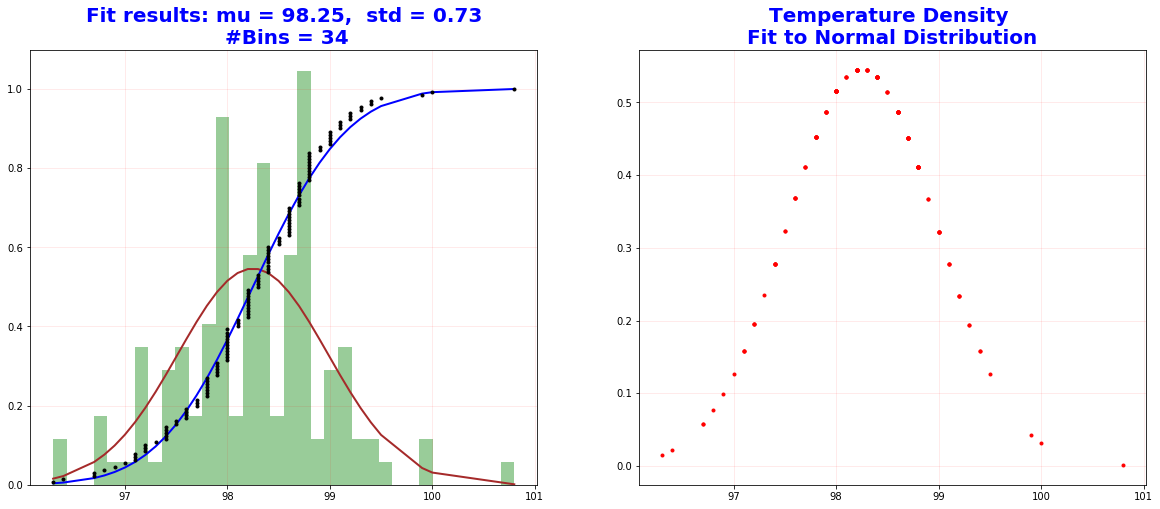

In [12]:
_ = plt.subplots(1, 2, figsize=(20, 8))
# Generate some data for this demonstration.
bin_size = len(set(df.temperature)) 
# Fit a normal distribution to the data:
mu, std = stats.norm.fit(df.temperature)

# First Plot showing histogram and probability and cumulative density of the data
_ = plt.subplot(121)
# Plot the histogram.
_ = plt.hist(df.temperature, bins = bin_size, density=True, alpha=0.4, color='g')

# Plot the PDF and CDF
p = stats.norm.pdf(sorted_temps, mu, std)
c = stats.norm.cdf(sorted_temps, mu, std)
# plot normalized fit of cdf and pdf
_ = plt.plot(sorted_temps, p, 'brown', linewidth=2)
_ = plt.plot(sorted_temps, c, 'b', linewidth=2)
# plot cdf
_ = plt.plot(sorted_temps, np.arange(1.0, len(df.temperature)+1) / len(df.temperature), \
         color='k', ls = 'none',marker='.')
title = "Fit results: mu = %.2f,  std = %.2f\n #Bins = %d" % (mu, std, bin_size)
_ = plt.title(title, fontweight = 'bold', color = 'b', size = 20)
_ = plt.grid(alpha=0.1, color='r')

# Second plot of fit to normal distribution
_ = plt.subplot(122)
pdf = stats.norm.pdf(sorted_temps, np.mean(sorted_temps), np.std(sorted_temps))
_ = plt.plot(sorted_temps, pdf, 'r.') # plot density of sorted temperature
_ = plt.title('Temperature Density \nFit to Normal Distribution', \
          fontweight='bold', size=20, color ='b')
_ = plt.grid(alpha=0.1, color='r')

# Show plots
_ = plt.show()


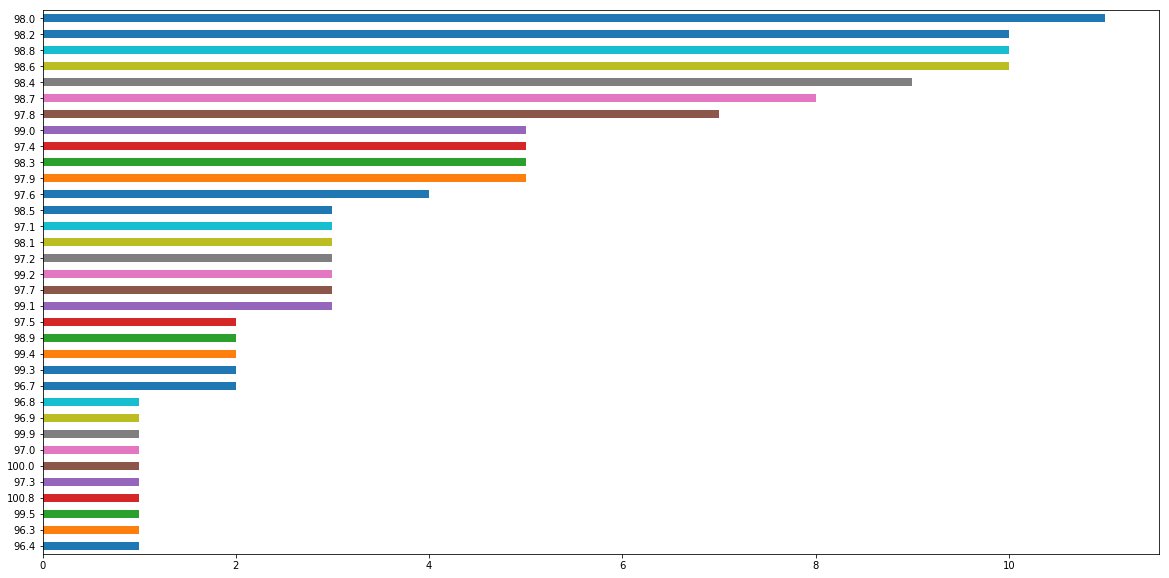

In [13]:
plt.figure(figsize=(20,10))
df.temperature.value_counts(ascending=True).plot('barh')
plt.show()

## **2. Is the sample size large? Are the observations independent?**
<ul>

$ \color{darkblue} {\large \textrm {Sample Size is large enough. } } $
<ul></ul>
$ \color{darkblue} {\textrm { 
To aquire data for human body temperature measurements involves a very large and dynamic population. } } $
<ul></ul>
$ \color{darkblue} {\textrm {
It will be impossible to collect data for the whole population. Generally a sample size  > 30 is considered large } } $
$ \color{darkblue} {\textrm {
enough to make statistical inference. In this case, 130 observations of human body temperature should be sufficient } } $
$ \color{darkblue} {\textrm { to make a statistical inference. }} $

$ \color{darkblue} {\textrm { Observations are assumed to be independent since we don't really know the source of this dataset. } } $
$ \color{darkblue} {\textrm { A more important consideration is to establish the observations were captured randomly and without } } $
$ \color{darkblue} {\textrm { bias (intentional or unintentional). Knowing the data is independent and representative of } } $ 
$ \color{darkblue} {\textrm { the population, we can then use various methods such as bootstraping to resample and accurately } } $
$ \color{darkblue} {\textrm { estimate the mean of normal human body temperature. } } $

## 3.  Is the true population mean really 98.6 degrees F?
<p>    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

$ \color{darkblue} {\textrm {For testing } {\bf population\;mean\;} \textrm { compared to }  \bf {\;sample\;mean,\;\underline {one-sample\;test} } \textrm{ is appropriate.} } $
<ul></ul>
$ \color{darkblue} {
\textrm {Here the objuctive is to determine equality of sample mean to population mean }
\bf {(\;98.6\; ^\circ F\;) }
\textrm { as stated in null hypothesis.}
\\
\textrm {In this case t-test and z-test  have similar results, however, } \bf {\;t-test\;}
\textrm {is more appropriate since it is known to be an } 
\bf {exact\;test\;}
\\
\textrm {for determining } \bf {\;'mean'\;equality\;} \textrm {of two } \bf {\;normally\;distributed\;} \textrm {samples or populations.}
 } $

$ \color{darkblue} {\textrm { For p-value } \le \; \alpha }  $
$ \color{darkblue} {\textrm { leads to Rejection of the Null-Hypothesis } (\; \bf{H{\substack{_0\;}} \bf} ) } $

$ \color{darkblue} {\Large \textrm {Summary of t-test and z-test } } $
<ul>
<ul/>
$ \color{darkblue} {\large \bf \textrm {z-test - } } $
$ \color{darkblue} {\textrm {determines statistical difference between sample mean and population mean } } $
<ul></ul>
$ \color{darkblue} {\large \bf \textrm {one-sample t-test - } } $
$ \color{darkblue} {\textrm {determines statistical difference between sample mean and population mean } } $
<ul></ul>    
$ \color{darkblue} {\large \bf \textrm {two-sample t-test - } } $
$ \color{darkblue} {\textrm {determines statistical difference between means of two independent samples }} $
    
*****

$ \color{darkblue} {\Large \textrm { Bootstrap hypothesis test } } $

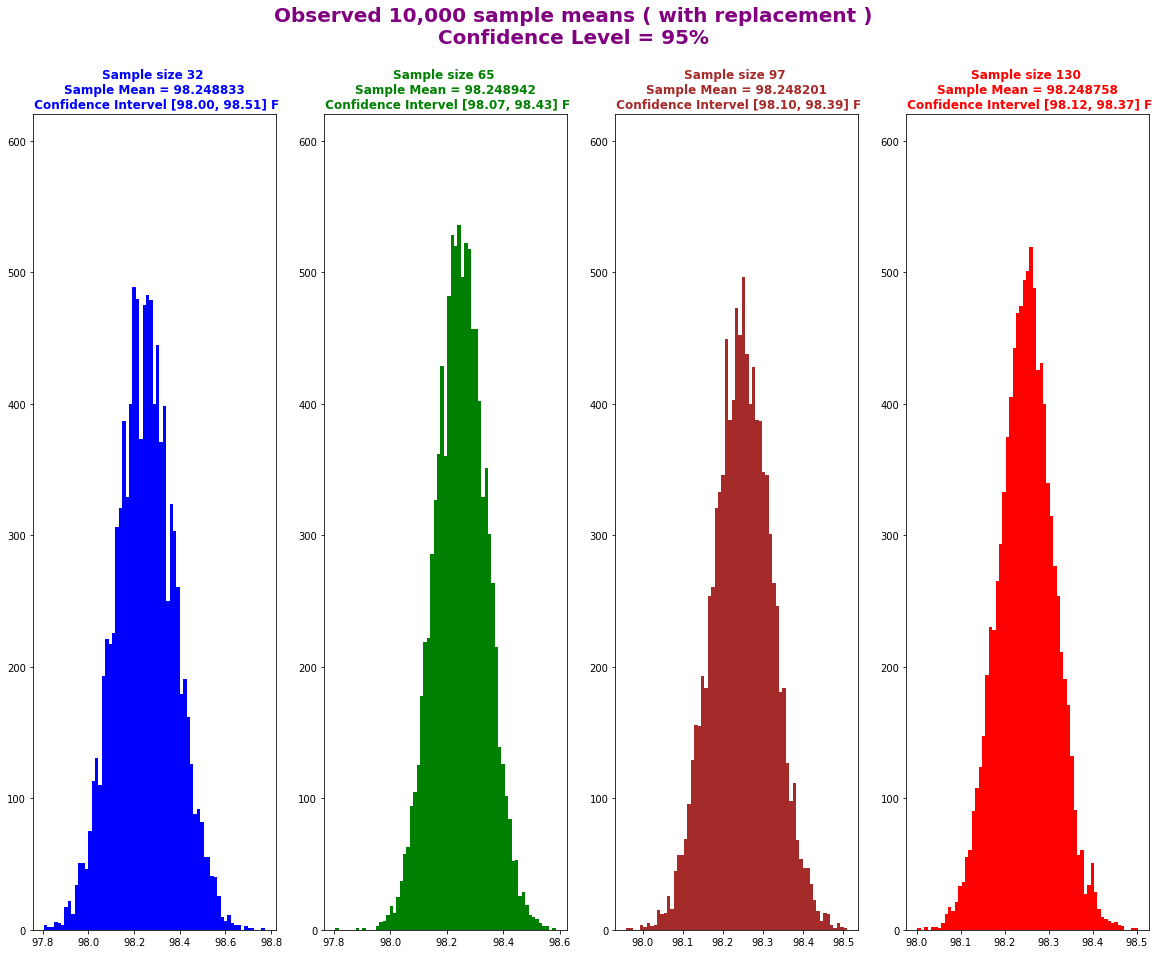

In [14]:
# Bootstrap 10K samples to estimate population mean
_ = plt.subplots(figsize = (20, 15))
_ = plt.suptitle('Observed 10,000 sample means ( with replacement )\nConfidence Level = 95%\n', \
                 fontweight = 'bold', color = 'purple', size = 20)
sp_array = [141,142,143,144]
sp_color = ['b', 'g', 'brown', 'r']
sp_idx = 0
#examine sample size of 32 (~25%), 65 (50%) 97 (~75%) and 130 (100%)
for sampleSize in [32, 65, 97, 130]:
    # initialize list
    bootstrap_means = []
    # Take 32, 65, 97, and 130 random samples with replacement
    # Plot sample mean distribution
    for i in range(10000):
        bootstrap_means.append(np.mean((df.temperature.sample(sampleSize, \
                                                              replace = True))))
    # Compute the 95% confidence interval: conf_int
    conf_Interval = (np.percentile(bootstrap_means, [2.5, 97.5]))
    _ = plt.subplot(sp_array[sp_idx])
    _ = plt.hist(bootstrap_means, color = sp_color[sp_idx], bins=65)
    _ = plt.ylim([0,620])
    _ = plt.title('\nSample size %d \nSample Mean = %.6f\n Confidence Intervel [%.2f, %.2f] F' \
                  % (sampleSize, np.mean(bootstrap_means), conf_Interval[0], conf_Interval[1]), \
                  color = sp_color[sp_idx], fontweight = 'bold')
    sp_idx += 1

*********
*********
<span> $ \Large \color{darkblue} {\textrm {Apply inferential statistics calculations for t-test and z-test} } $ </span>
<ul><ul>
<li> $ \color{darkblue} {\textrm {Null Hypothesis, H} \substack{0} \textrm {: The mean of population is } \bf {98.6 \; ^\circ F } } $
    <li> $ \color{darkblue} { {\large \alpha} \textrm { = 0.05 = 5}\% } $ </li>
<li> $ \color{darkblue} {\textrm {t-test is more appropriate since it is known to be an exact test to determine mean equality of two normally distributed}
\\
\textrm {samples or populations.} } $
<li> $ \color{darkblue} {\textrm {z-test to compare with t-test } } $ <ul></ul>

In [15]:
# Calculate Standard Error
StandardError = df.temperature.std() / np.sqrt(len(df.temperature))
# t-Test to test if mean of sample is equal to population mean (98.6 F)
t_test = stats.ttest_1samp(df.temperature, 98.6, axis=0)
z_test = sm.stats.ztest(df.temperature, value=98.6)
print('Standard Error = %.4f\nT-Statistics = %.4f \nP-value = %.4e\nZ-Statistics = %.4f\nP-Value = %.4e' \
      % (StandardError, t_test[0], t_test[1], z_test[0], z_test[1]))

Standard Error = 0.0643
T-Statistics = -5.4548 
P-value = 2.4106e-07
Z-Statistics = -5.4548
P-Value = 4.9022e-08


In [16]:
# Using stat models api to estimate z-statistics with population mean
z_test = sm.stats.ztest(df.temperature, value=98.6)
# calculate z-stat manually
z_stat = (df.temperature.mean() - 98.6) / StandardError
p_value = stats.norm.sf(np.abs(z_stat))*2
print('ztest_stat = %.4f\nztest_p-value = %.2e\nz_stat = %.4f\np-value = %.2e' \
     % (z_test[0], z_test[1], z_stat, p_value))

ztest_stat = -5.4548
ztest_p-value = 4.90e-08
z_stat = -5.4548
p-value = 4.90e-08


## 4.  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
<p>
<ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

$ \color{darkblue} {
\textrm {It appears that a sample with 10 observations may not be large enough to draw appropriate conclusion }
\\ 
\textrm {since each random set produce a p-value significantly different form the next. }
\\
\textrm {In some cases, p-values for t-test and z-test are far below the } 
{\large \alpha} 
\textrm { = 5% and in other cases very high.} 
\\
\textrm {Here, calculated t-statistics and z-statistics values may be considered the same since variations are similar.}
 } $
<ul></ul>

In [17]:
# T-Test and Z-Test for the small sub sample
# Drawing 10 random samples
sample = df.temperature.sample(10, random_state = 15, replace=True)
pd.DataFrame(sample).set_index('temperature')

""
temperature
98.4
97.9
97.1
98.7
98.2
98.4
98.2
98.8
96.7


In [18]:
#calculate mean
sample_mean = np.mean(sample)
print('Mean of sample with 10 observations  = %.2f F' % sample_mean)
# T-Test of small sample of size=10
t_test = stats.ttest_1samp(sample, 98.6, axis = 0)
print('\nT statistics = %.6f \np-value = %.4f' % (t_test[0], t_test[1]))
# Z-Test of small sample of size=10
z_test = sm.stats.ztest(sample, value=98.6)
print('\nZ statistics = %.6f \np-value = %.4f' % (z_test[0], z_test[1]))

Mean of sample with 10 observations  = 97.88 F

T statistics = -2.688264 
p-value = 0.0249

Z statistics = -2.688264 
p-value = 0.0072


In [19]:
#  table of test statistics for 10 different samples of size = 10
df_statistics = pd.DataFrame()
idx = 0
for rand_seed in range(14,85,5):
    bootstrap_sample = df.temperature.sample(10, random_state = rand_seed, replace=True)
    s_mean = round(np.mean(bootstrap_sample),2)
    t_test = np.round(stats.ttest_1samp(bootstrap_sample, 98.6, axis = 0),4)
    z_test = np.round(sm.stats.ztest(bootstrap_sample, value=98.6),4)
    new_row = pd.Series([s_mean, t_test[0], z_test[0], t_test[1], z_test[1]])
    df_statistics = df_statistics.append(new_row, ignore_index = True)
    idx += 1
df_statistics.columns = ['sample_mean', \
                         't-statistics', 'z-statistics', \
                         't-p-value', 'z-p-value']
df_statistics.set_index('sample_mean')

,t-statistics,z-statistics,t-p-value,z-p-value
sample_mean,,,,
98.14,-3.3629,-3.3629,0.0084,0.0008
98.51,-0.4003,-0.4003,0.6983,0.6889
97.96,-2.9334,-2.9334,0.0167,0.0034
98.46,-0.4810,-0.4810,0.6420,0.6305
98.05,-1.9885,-1.9885,0.0780,0.0468
98.16,-1.9205,-1.9205,0.0870,0.0548
98.38,-0.9227,-0.9227,0.3802,0.3561
98.18,-1.8918,-1.8918,0.0911,0.0585
98.31,-1.3987,-1.3987,0.1954,0.1619


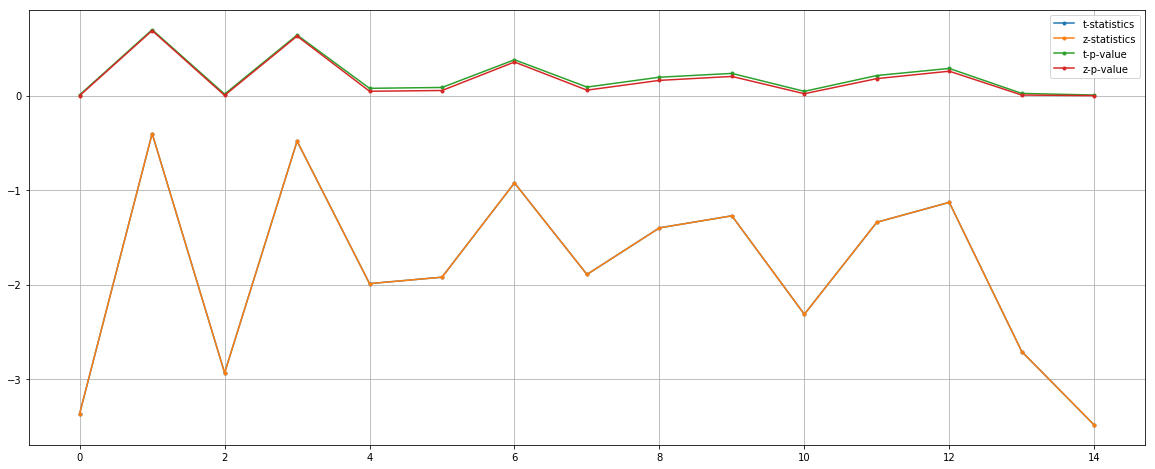

In [20]:
df_statistics.iloc[:,1:5].plot(grid=True,figsize=(20,8), marker='.')
plt.show()

## 5.  At what temperature should we consider someone's temperature to be "abnormal"?
<p>
<ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

$ \color {darkblue} {
\textrm {Considering absence of definition for "abnormal", and assuming all observations were taken from people in normal health,}
\\
\textrm {all three approaches will be considered for comparison for original sample of 130 observation.} 
\\
\textrm {Assuming normal distribution, }
{\bf 3 \large \sigma }
\textrm { (standard diviation) above and below the }
\bf \textrm {sample mean, } 
\bf {\large \mu} 
\textrm {, represent } {\bf 99.73\%} 
\textrm { of normal observations. }
\\
\textrm {Three } 
\bf {\large \sigma} 
\textrm { calculations imply an }
\bf {"abnormal"} 
\textrm { human body temperature to be }
\bf { \,\le  96.05\;^\circ F\;}
\textrm {  or  } 
\bf { \; \ge \;100.45\; ^\circ F.} } $
<ul></ul>
$ \color {darkblue} {
\textrm {Similarly, the }
\bf {bootstrap\;analysis}
\textrm { suggest human body temperature }
\bf {\le \;95.99\;^\circ F\;} \textrm { and } \bf {\ge 100.51\; ^\circ F}
\textrm { may be considered } \bf {\;"abnormal".}
} $


In [21]:
# For normal distribution 3 sigma (standard diviation) holds 99.73% of normal observations
lo_limit = df.temperature.mean() - df.temperature.std()*3
up_limit = df.temperature.mean() + df.temperature.std()*3
print('3 sigma (std) above and below the sample mean represent 99.73% of normal observations')
print('[%.2f, %.2f] F' % (lo_limit, up_limit))

3 sigma (std) above and below the sample mean represent 99.73% of normal observations
[96.05, 100.45] F


In [22]:
# Get 95% and 99% values of original sample to calculate confidence interval
z_critical_os = stats.t.isf([0.025,0.005], len(df.temperature)-1)
# Get 95% and 99% values of bootstrap sample to calculate confidence interval
z_critical_bs = stats.t.isf([0.025,0.005], len(bootstrap_sample)-1)
# Get 95% and 99% values of single 10-sample draw to calculate confidence interval
z_critical_s10 = stats.t.isf([0.025,0.005], len(sample)-1)

# Print 95% confidence interval
print('\t%s Sample Confidence Interval' % '95%')
print('Sample => \t\t\t[%.2f, %.2f]' \
      % (df.temperature.mean() - z_critical_os[0], \
         df.temperature.mean() + z_critical_os[0]))
print('================================================')
print('Bootstrap Sample (10K) =>\t[%.2f, %.2f]'\
      % (np.mean(bootstrap_means) - z_critical_bs[0], \
         np.mean(bootstrap_means) + z_critical_bs[0]))
print('================================================')
print('Single Sample Draw (10) =>\t[%.2f, %.2f]'\
      % (sample_mean - z_critical_s10[0], \
         sample_mean + z_critical_s10[0]))

# Print 99% confidence interval
print('\n\t%s Sample Confidence Interval' % '99%')
print('Sample => \t\t\t[%.2f, %.2f]'\
      % (df.temperature.mean() - z_critical_os[1], \
         df.temperature.mean() + z_critical_os[1]))
print('Bootstrap Sample (10K) =>\t[%.2f, %.2f]'\
      % (np.mean(bootstrap_means) - z_critical_bs[1], \
         np.mean(bootstrap_means) + z_critical_bs[1]))
print('Single Sample Draw (10) =>\t[%.2f, %.2f]' \
      % (np.mean(sample_mean) - z_critical_s10[1], \
         np.mean(sample_mean) + z_critical_s10[1]))

	95% Sample Confidence Interval
Sample => 			[96.27, 100.23]
Bootstrap Sample (10K) =>	[95.99, 100.51]
Single Sample Draw (10) =>	[95.62, 100.14]

	99% Sample Confidence Interval
Sample => 			[95.63, 100.86]
Bootstrap Sample (10K) =>	[95.00, 101.50]
Single Sample Draw (10) =>	[94.63, 101.13]


In [23]:
# To calculate ME (Margin of Error), we use sample standard diviation,
# since population standard diviation is unknown

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
# Z-critical value
print("z-critical value: %.4f" % z_critical)    
# calculate Margin of Error for original Sample (df.temperature)
ME = z_critical * (df.temperature.std()/np.sqrt(len(df.temperature)))
sample_mean = df.temperature.mean()
confidence_interval = np.round([sample_mean - ME, \
                       sample_mean + ME], 2)

print('Sample Confidence Interval:\t\t\t%r' % confidence_interval)

# calculate Margin of Error of bootstrap sample
ME = z_critical * (np.std(bootstrap_sample)/np.sqrt(len(bootstrap_sample)))
sample_mean = np.mean(bootstrap_sample)
confidence_interval = np.round([sample_mean - ME, \
                       sample_mean + ME], 2)
print('Random Bootstrap Sample Confidence Interval:\t%r' % confidence_interval)

# calculate Margin of Error of random sample of size 10
sample = df.temperature.sample(10, random_state = 40, replace=True)
ME = z_critical * (np.std(sample)/np.sqrt(len(sample)))
sample_mean = np.mean(sample)
confidence_interval = np.round([sample_mean - ME, \
                       sample_mean + ME], 2)
print('Random Sample(10) Confidence Interval:\t\t%r' % confidence_interval)

z-critical value: 1.9600
Sample Confidence Interval:			array([98.12, 98.38])
Random Bootstrap Sample Confidence Interval:	array([97.74, 98.34])
Random Sample(10) Confidence Interval:		array([98.38, 99.16])


## 6.  Is there a significant difference between males and females in normal temperature?
<p>
<ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

$ \color{darkblue} { \textrm {Applying } {\textbf {two-sample t-test } }
\textrm { is appropriate in this case since the objective is to compare mean of two groups within }
\\
\textrm { the same population.}} $

$ \color{darkblue} {  \textrm {Female body temperature is on the higher side while male body temperature is on the lower side. }
\\
\textrm {Moreover, female body temperature observations have outliers that are not present in the male body temperature observations. }
\\
\textrm {This slight temperature difference or shift in temperature range between genders could be related to the fact that female height }
\\
\textrm {is generally shorter than male height. } } $
<ul></ul>
$ \color{darkblue} { \textrm {In conclusion, with Male mean body temperature = 98.10 } { ^\circ } \textrm {F}
\textrm {, and  Female mean body temperature = 98.39 } { ^\circ } \textrm {F, clearly the}
\\
\textrm {two means are not equal. The independent t-test p-value also rejects the equality of the two means. }
\\
\textrm {Moreover, the body temperature mean of each gender compared to the population mean is also rejected by the t-test for equality. }
\\
\textrm {With this observation, it can be stated that the mean human body temperature is not 98.6 } {^\circ F\;\;}
\textrm {as stated by Carl Wunderlich.  } } $
<ul><ul/>
$ \color{darkblue} {} $

In [24]:
M_df_temp = df.temperature[df.gender == 'M'].tolist()
F_df_temp = df.temperature[df.gender == 'F'].tolist()
gender_temp = pd.DataFrame(np.transpose([M_df_temp, F_df_temp]), columns=['Male','Female'])

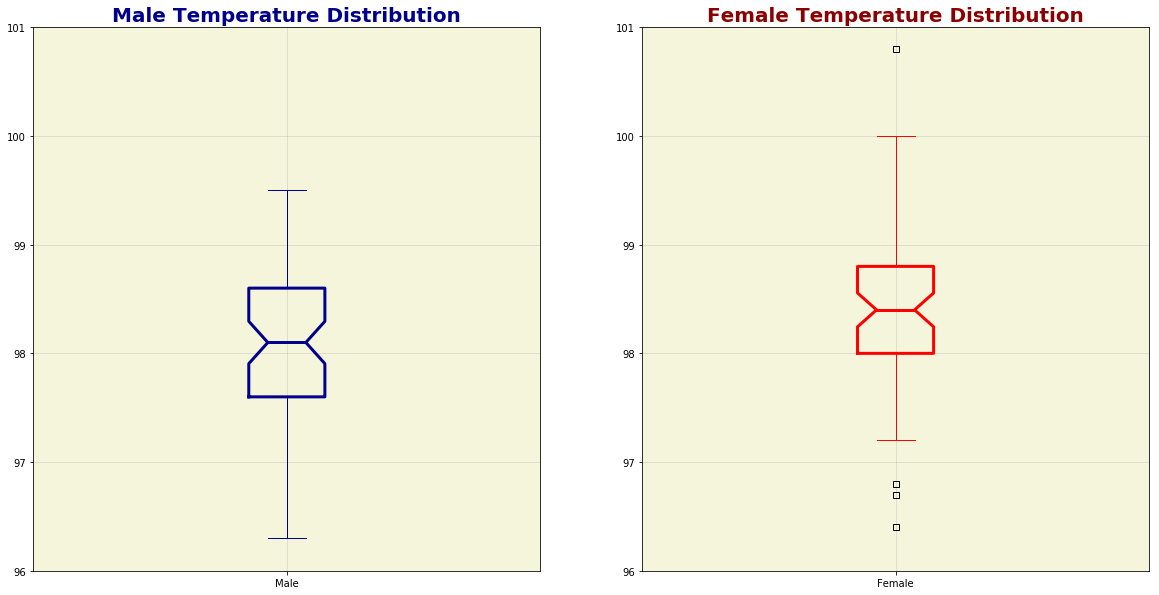

In [25]:
_ = plt.subplots(1, 2, figsize = (20,10))
_ = plt.subplot(121)
boxM = gender_temp.Male.plot('box', color = 'darkblue', notch = True, \
                             boxprops = {'linewidth': '3' },\
                             medianprops = {'linewidth': '3'})
_ = plt.setp(boxM, facecolor='beige')
_ = plt.title('Male Temperature Distribution', size = 20, \
              fontweight = 'bold', color = 'darkblue')
_ = plt.ylim([96,101])
_ = plt.grid(alpha = 0.4)
_ = plt.subplot(122)

boxF = gender_temp.Female.plot('box', color = 'r', notch = True, \
                               boxprops = {'linewidth': '3' }, \
                               medianprops = {'linewidth': '3'}, \
                               flierprops = {'marker': 's'})
_ = plt.setp(boxF, facecolor='beige')
_ = plt.title('Female Temperature Distribution', size = 20, \
              fontweight = 'bold', color = 'darkred')
_ = plt.ylim([96,101])
_ = plt.grid(alpha = 0.4)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


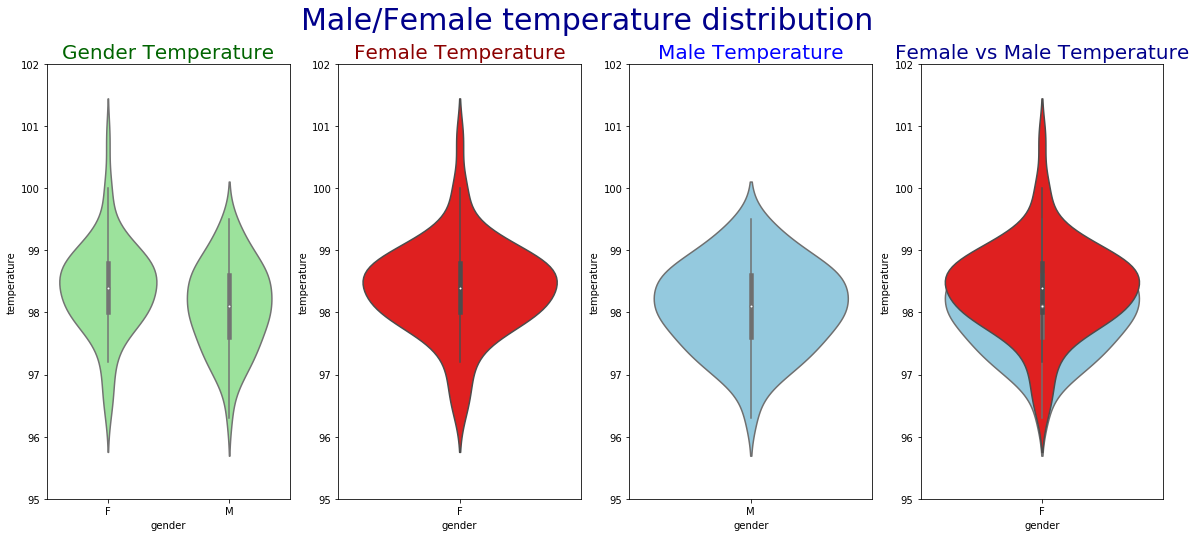

In [26]:
import seaborn as sns
_ = plt.subplots(1,4, figsize = (20,8))
_ = plt.suptitle('Male/Female temperature distribution', size = 30, color = 'darkblue')
_ = plt.subplot(141)
_ = plt.title('Gender Temperature', size = 20, color = 'darkgreen')
_ = sns.violinplot(x='gender', y='temperature', data = df, \
                   color = ('lightgreen'))
_ = plt.ylim([95,102])
_ = plt.subplot(142)
_ = plt.title('Female Temperature', size = 20, color = 'darkred')
_ = sns.violinplot(x='gender', y='temperature', \
                   data=df[df.gender == 'F'], \
                   color = 'r')
_ = plt.ylim([95,102])

_ = plt.subplot(143)
_ = plt.title('Male Temperature', size = 20, color = 'blue')
_ = sns.violinplot(x="gender", y="temperature", data=df[df.gender == 'M'], color = 'skyblue')
_ = plt.ylim([95,102])

_ = plt.subplot(144)
_ = plt.title('Female vs Male Temperature', size = 20, color = 'darkblue')
_ = sns.violinplot(x="gender", y="temperature", data=df[df.gender == 'M'], \
                   color = 'skyblue')
_ = sns.violinplot(x="gender", y="temperature", data=df[df.gender == 'F'], \
                   color = 'r')
_ = plt.ylim([95,102])
_ = plt.show()

In [27]:
df_gender = df.groupby('gender')['temperature'].count()
print('There are equal number of observations for both Male and Female\n', df_gender)

There are equal number of observations for both Male and Female
 gender
F    65
M    65
Name: temperature, dtype: int64


$ \color{darkblue} { \Large \textrm {To compare male vs female mean body temperature, two-sample t-test }} $
$ \color{darkblue} { \Large \textrm {compares mean body temperature for male and female observations. }} $

In [28]:
def conf_interval(df_series, conf_level):
    ''' calculate the mean and confidence inteval'''
    Mean = df_series.mean()
    Std = df_series.std()
    SE = Std / np.sqrt(len(df_series))
    Error = SE * stats.norm.ppf(1 - (1-conf_level)/2.)
    CI = [Mean - Error, Mean + Error]
    return(Mean, CI)

In [29]:
M_Mean, M_CI = conf_interval(gender_temp.Male, 0.95)
F_Mean, F_CI = conf_interval(gender_temp.Female, 0.95)
# Gender based mean body temperature
print('Male mean Temperature: %.2f F\nFemale mean Temperature: %.2f F' \
      % (M_Mean, F_Mean))
print('\nBody Temperature\n\t Mean\t\tConfidence Interval')
print('Male :\t %.2f F\t[%.2f, %.2f] F\nFemale : %.2f F\t[%.2f, %.2f] F' \
      % (M_Mean, M_CI[0], M_CI[1], F_Mean, F_CI[0], F_CI[1]))

Male mean Temperature: 98.10 F
Female mean Temperature: 98.39 F

Body Temperature
	 Mean		Confidence Interval
Male :	 98.10 F	[97.93, 98.27] F
Female : 98.39 F	[98.21, 98.57] F


$ \color{darkblue} { \Large \textrm {Using one-sample  t-test  to compare each gender mean body temperature}}$
$ \color{darkblue} { \Large \textrm {to population mean. }}$

In [30]:
print('Male Body Temperature\nt-Statistic = %.2f\nt-p-value = %.2e' \
      % (stats.ttest_1samp(gender_temp.Male, 98.6)))
print('\nFemale Body Temperature\nt-Statistic = %.2f\nt-p-value = %.2e' \
      % (stats.ttest_1samp(gender_temp.Female, 98.6)))

Male Body Temperature
t-Statistic = -5.72
t-p-value = 3.08e-07

Female Body Temperature
t-Statistic = -2.24
t-p-value = 2.89e-02


In [31]:
print('Independent Two-sample t-test\nStatistics = %.2f\np-value = %.2e' \
% (stats.ttest_ind(gender_temp.Male, gender_temp.Female)))

Independent Two-sample t-test
Statistics = -2.29
p-value = 2.39e-02


$ \color{darkblue} { \Large { \textrm {The p-value drops significantly after removing the outliers from female }
\\
\textrm {temperature observations  }} }$

In [32]:
F_no_oultlier = [f_temp for f_temp in gender_temp.Female if f_temp < 100.5 and f_temp > 97]

In [33]:
st, p_value = stats.ttest_ind(gender_temp.Male, F_no_oultlier, axis=0, equal_var=True)
print('Independent Two-sample t-test\nStatistics = %.2f\np-value = %.2e' % (st, p_value))

Independent Two-sample t-test
Statistics = -2.93
p-value = 4.00e-03
